<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/7%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_2_2023431213_%E1%84%87%E1%85%A1%E1%86%A8%E1%84%87%E1%85%A9%E1%86%BC%E1%84%8C%E1%85%AE%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장 시각화 라이브러리II

## 5.3 시각화 라이브러리II 연습 문제

###문제3
2020년 건강검진 데이터의 성별과 흡연 상태 정보를 이용하여 다음 카운트 플롯 그래프와 같이 출력되도록 빈칸에 알맞은 코드를 완성하시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('05_data1.xlsx')

In [2]:
data

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
2996,7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
2997,7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0
2998,7652,42,1,9,180,90,97.0,148,90,101,235,232,43.0,145,16.6,0.7,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no             3000 non-null   int64  
 1   city_code      3000 non-null   int64  
 2   gender         3000 non-null   int64  
 3   age_code       3000 non-null   int64  
 4   height         3000 non-null   int64  
 5   weight         3000 non-null   int64  
 6   waist          3000 non-null   float64
 7   systolic       3000 non-null   int64  
 8   diastolic      3000 non-null   int64  
 9   blood_sugar    3000 non-null   int64  
 10  cholesterol    3000 non-null   int64  
 11  triglycerides  3000 non-null   int64  
 12  HDL            3000 non-null   float64
 13  LDL            3000 non-null   int64  
 14  hemoglobin     3000 non-null   float64
 15  serum          3000 non-null   float64
 16  smoking        3000 non-null   int64  
 17  drinking       3000 non-null   int64  
dtypes: float

In [4]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

In [5]:
data6.head()

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,0,Non-smoking
1,Female,155,50,75.2,0,Non-smoking
2,Male,185,85,94.0,1,Smoking
3,Male,165,80,93.0,1,Smoking
4,Female,150,50,82.0,0,Non-smoking


In [6]:
smoking = data6.groupby(['gender','smoking'])['smoking'].count()
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()
smoking

,gender,smoking,count
0,Female,Non-smoking,1422
1,Female,Quit-smoking,45
2,Female,Smoking,32
3,Male,Non-smoking,502
4,Male,Quit-smoking,519
5,Male,Smoking,480


In [7]:
smoking.columns

Index(['gender', 'smoking', 'count'], dtype='object')

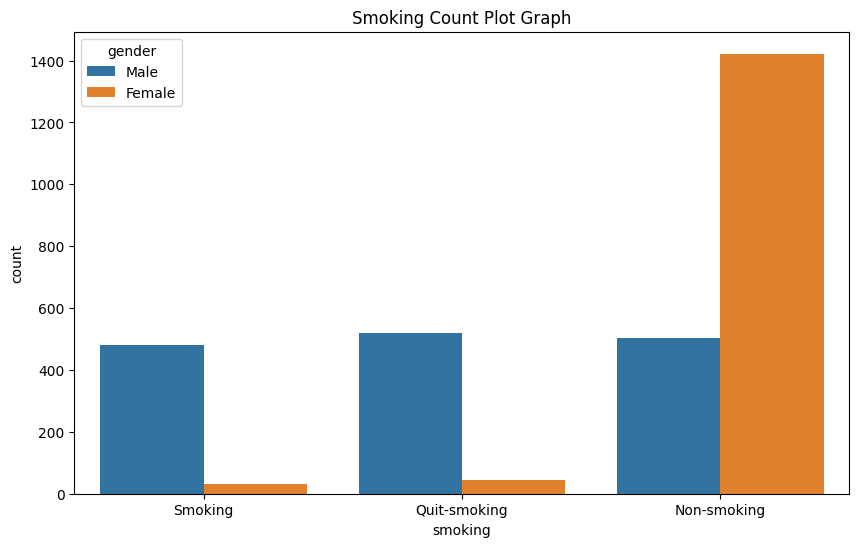

In [8]:
plt.figure(figsize=(10,6))
plt.title('Smoking Count Plot Graph')
sns.barplot(x='smoking', y='count', data=smoking, hue='gender', order=['Smoking', 'Quit-smoking', 'Non-smoking'], 
            hue_order=['Male', 'Female'])

plt.show()

###문제4
2020년 건강검진 데이터의 성별과 음주 여부 정보를 이용하여 다음 가로 카운트 플롯 그래프와 같이 출력되도록 빈칸에 알맞은 코드를 완성하시오.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('05_data1.xlsx')

In [10]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'

In [11]:
drinking = data6.groupby(['gender','drinking'])['drinking'].count()
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()

In [12]:
drinking

,gender,drinking,count
0,Female,Drinking,611
1,Female,Non-drinking,888
2,Male,Drinking,1086
3,Male,Non-drinking,415


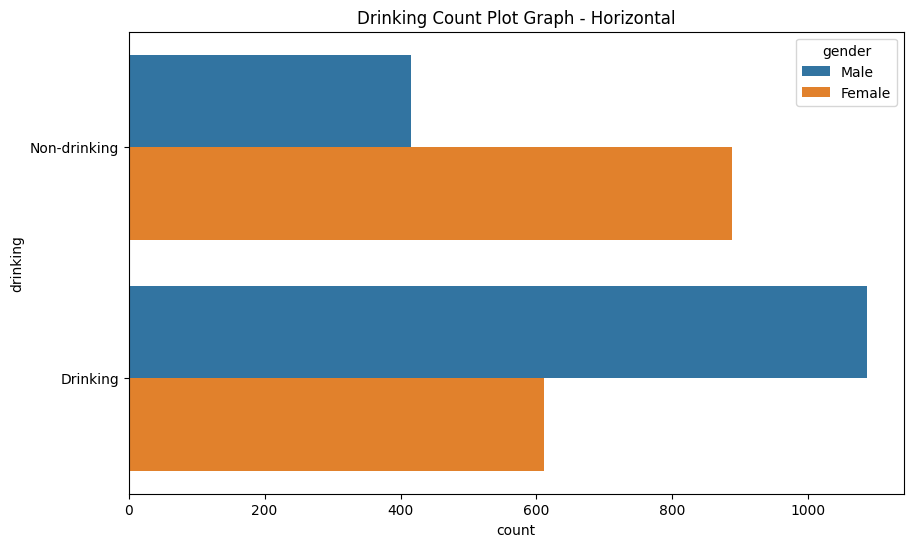

In [13]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph - Horizontal')
sns.barplot(y='drinking', x='count', data=drinking, hue='gender', order=['Non-drinking', 'Drinking'], hue_order=['Male','Female'])
plt.show()

###문제5
2020년 건강검진 데이터의 음주 여부와 허리둘레 정보를 이용하여 다음 시본 상자수염 그래프와 같이 출력되도록 빈칸에 알맞은 코드를 완성하시오.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('05_data1.xlsx')

In [15]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'

In [16]:
drinking = data6.groupby(['gender','drinking'])['drinking'].count()
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()

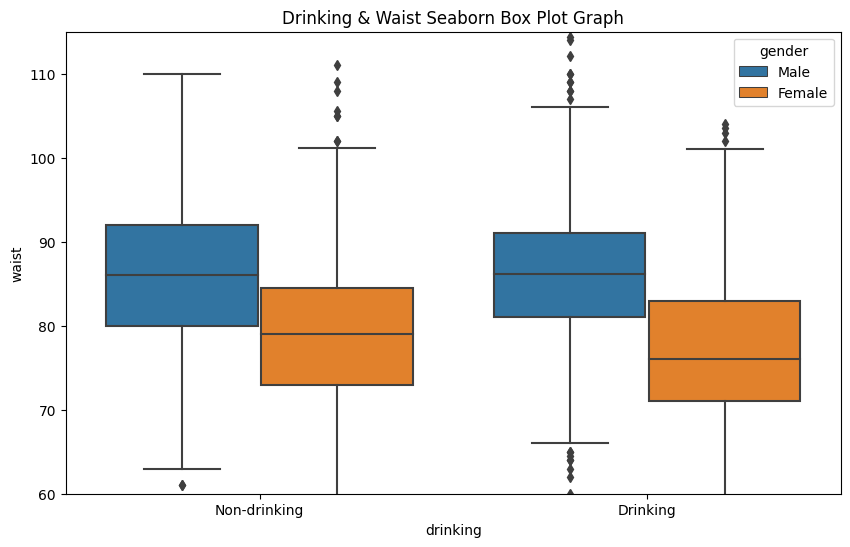

In [17]:
plt.figure(figsize=(10,6))
plt.title('Drinking & Waist Seaborn Box Plot Graph')
sns.boxplot(x='drinking', y='waist', hue='gender', data=data6)

plt.ylim(60,115)
plt.show()

###문제6
2020년 건강검진 데이터의 성별, 몸무게를 흡연상태로 분리하여 다음 바이올린 플롯 그래프와 같이 출력되도록 빈칸에 알맞은 코드를 완성하시오(단, 몸무게는 120 미만).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('05_data1.xlsx')

In [19]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='Male'
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

In [20]:
smoking = data6.groupby(['gender','smoking'])['smoking'].count()
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()

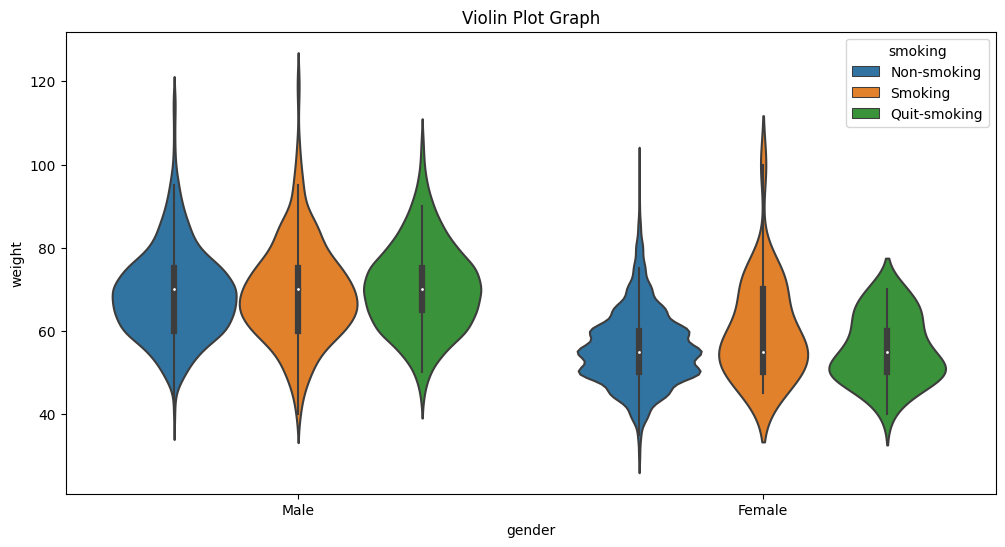

In [21]:
plt.figure(figsize=(12,6))
plt.title('Violin Plot Graph')

sns.violinplot(data=data6, x='gender', y='weight', hue='smoking' )
plt.show()

###문제7
2020년 건강검진 데이터를 이용하여 다음 히트맵 그래프와 같이 출력되도록 빈칸에 알맞은 코드를 완성하시오.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('05_data1.xlsx')

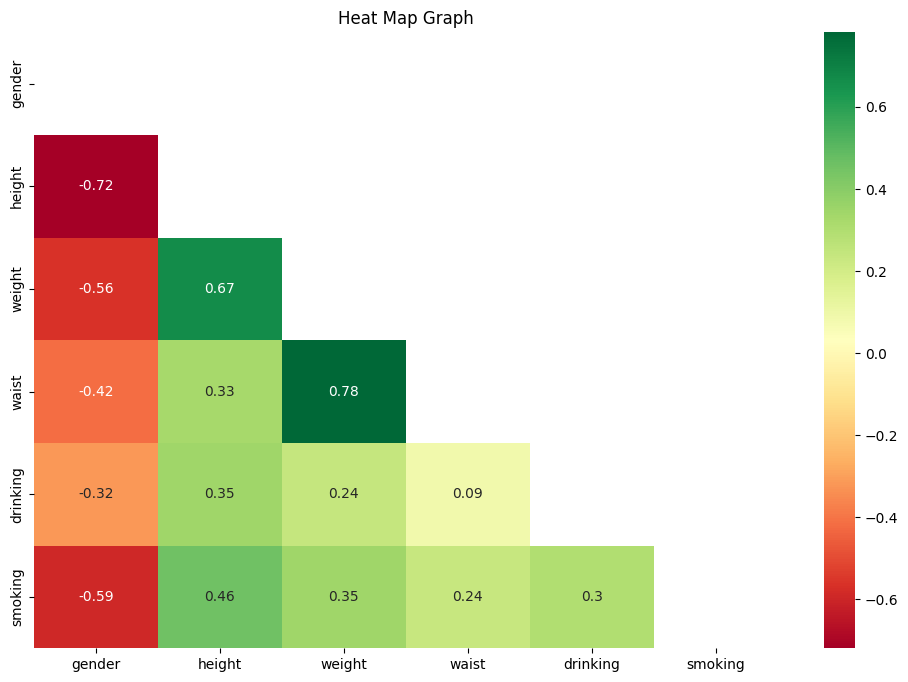

In [23]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]

plt.figure(figsize=(12,8))
plt.title('Heat Map Graph')

correlation_data6 = data6.corr()
upp_mat = np.triu(correlation_data6)
# 빈칸
sns.heatmap(data=correlation_data6, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.show()

###문제8
2020년 건강검진 데이터를 이용하여 다음 페어 플롯 그래프와 같이 출력되도록 빈칸에 알맞은 코드를 완성하시오(단, 대각선은 히스토그램, 나머지는 산점도 그래프).

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('05_data1.xlsx')

In [25]:
data3 = data.loc[:,['gender','height','weight','waist']]
data3.loc[data3['gender']==1,['gender']]='Male'
data3.loc[data3['gender']==2,['gender']]='Female'

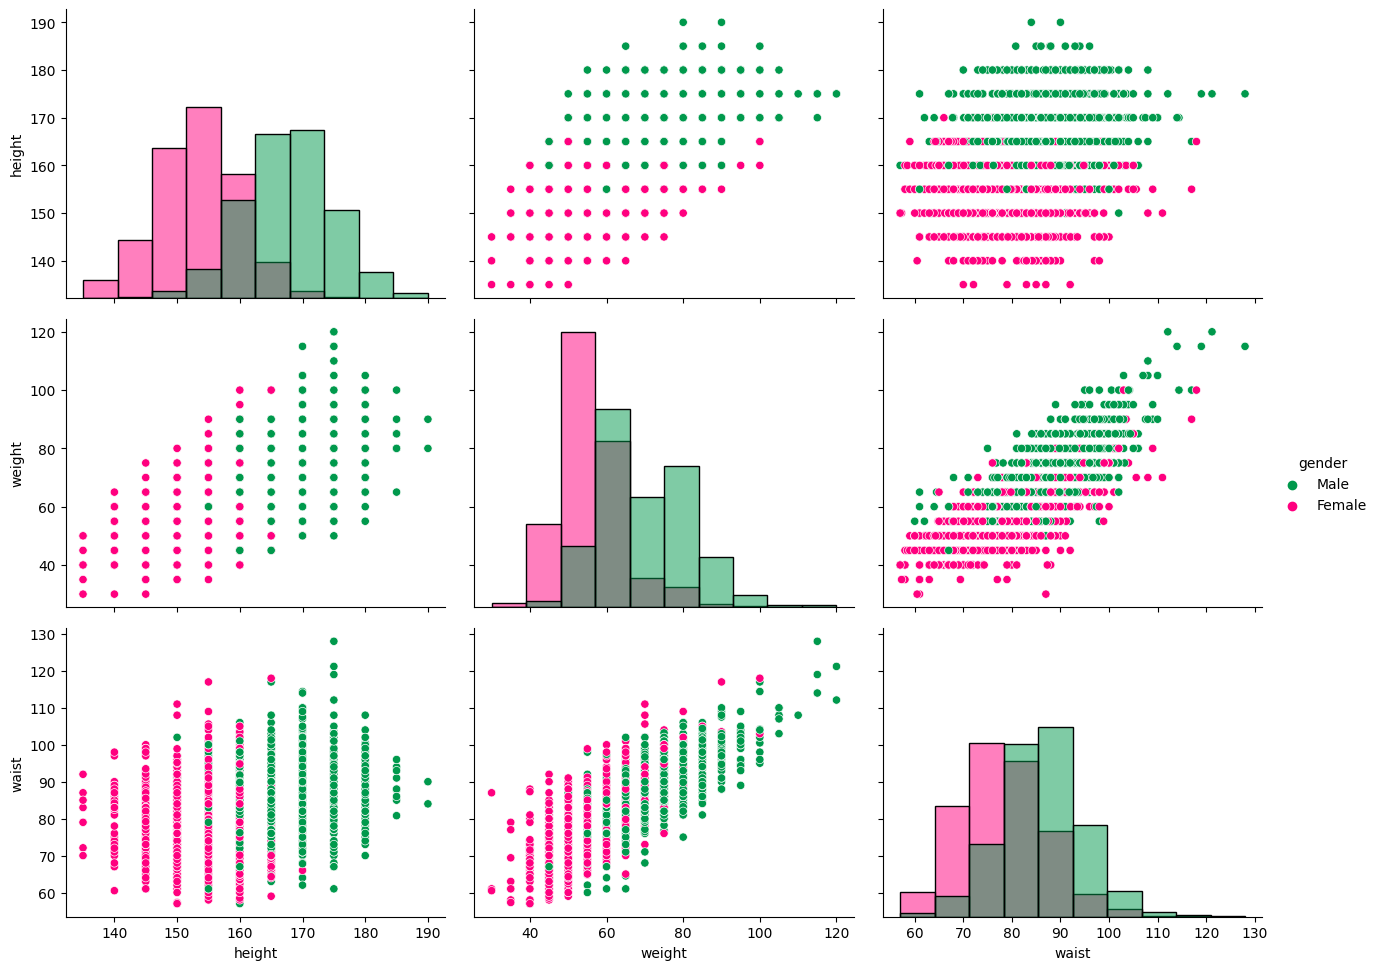

In [26]:
color = ['#00994C', '#FF007F']
pp = sns.PairGrid(data3,hue='gender',palette=color,height=3.3,aspect=1.3)
pp.map_diag(sns.histplot, bins=10)
pp.map_offdiag(sns.scatterplot)
pp.add_legend()
plt.show()